In [1]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
ds = Dataset('/data/SO2/fkalkin/DataDir/Raw/Argo/temp-sal/RG_ArgoClim_Salinity_2019.nc')
tempvar = 3.0328650011556393
salvar = 0.06086461523898359

In [2]:
pressure_lookup = ds['PRESSURE'][:].data
pressure_lookup

array([   2.5,   10. ,   20. ,   30. ,   40. ,   50. ,   60. ,   70. ,
         80. ,   90. ,  100. ,  110. ,  120. ,  130. ,  140. ,  150. ,
        160. ,  170. ,  182.5,  200. ,  220. ,  240. ,  260. ,  280. ,
        300. ,  320. ,  340. ,  360. ,  380. ,  400. ,  420. ,  440. ,
        462.5,  500. ,  550. ,  600. ,  650. ,  700. ,  750. ,  800. ,
        850. ,  900. ,  950. , 1000. , 1050. , 1100. , 1150. , 1200. ,
       1250. , 1300. , 1350. , 1412.5, 1500. , 1600. , 1700. , 1800. ,
       1900. , 1975. ], dtype=float32)

In [3]:
pressure_lookup[25:56][18]

1000.0

In [4]:
import pickle

with open('u.pkl', 'rb') as f:
    U = pickle.load(f)

with open('amp.pkl', 'rb') as f:
    amp = pickle.load(f)

with open('var.pkl', 'rb') as f:
    var = pickle.load(f)

In [5]:
print('# of EOFs \t | % of total variance represented')
rsum = 0
tsum = sum(var)
for i, num in enumerate(var[:16]):
    rsum += num
    print(f'{i+1} \t \t | {rsum / tsum * 100}')

# of EOFs 	 | % of total variance represented
1 	 	 | 70.51601287563456
2 	 	 | 92.61597368251756
3 	 	 | 96.83254563956794
4 	 	 | 98.76718748442434
5 	 	 | 99.49774931029462
6 	 	 | 99.76087497225411
7 	 	 | 99.85463223118367
8 	 	 | 99.91804388040208
9 	 	 | 99.94266467826873
10 	 	 | 99.96147996059331
11 	 	 | 99.97093954010855
12 	 	 | 99.97964417376932
13 	 	 | 99.98408312366526
14 	 	 | 99.98751741765415
15 	 	 | 99.98985188827577
16 	 	 | 99.99136673147216


Text(0.5, 1.0, 'Variance Explained by Each EOF')

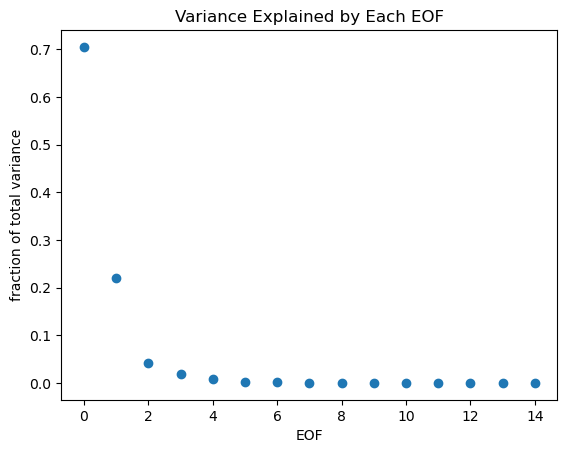

In [6]:
plt.scatter(x=np.arange(15), y=var[:15] / sum(var));
plt.ylabel('fraction of total variance')
plt.xlabel('EOF')
plt.title('Variance Explained by Each EOF');

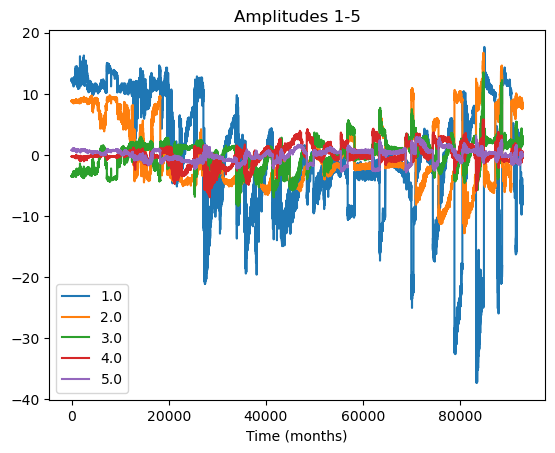

In [18]:
for i in range(5):
    plt.plot(np.arange(234 * 397), amp[i])
plt.xlabel('Time (months)')
plt.legend(np.arange(5) + np.ones(5))
plt.title(f'Amplitudes 1-5')
plt.show()

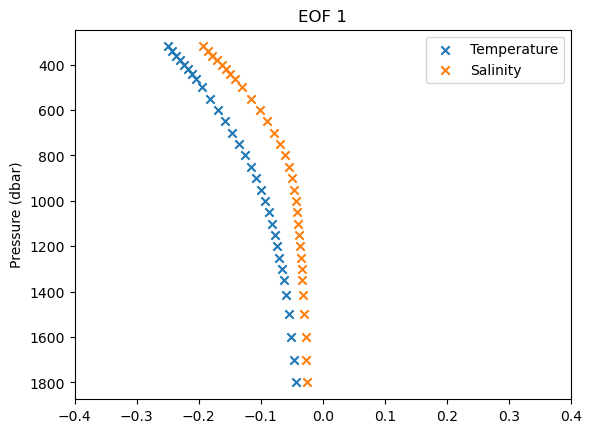

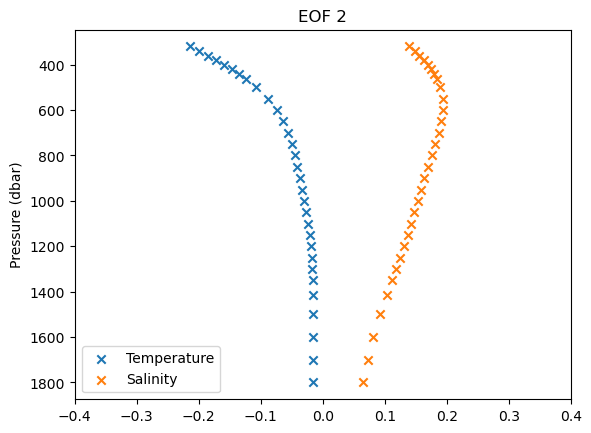

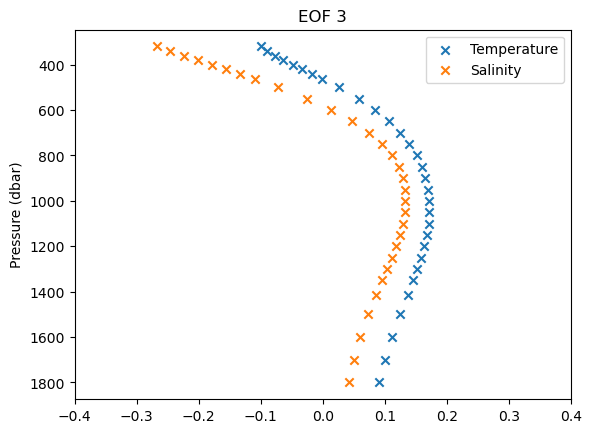

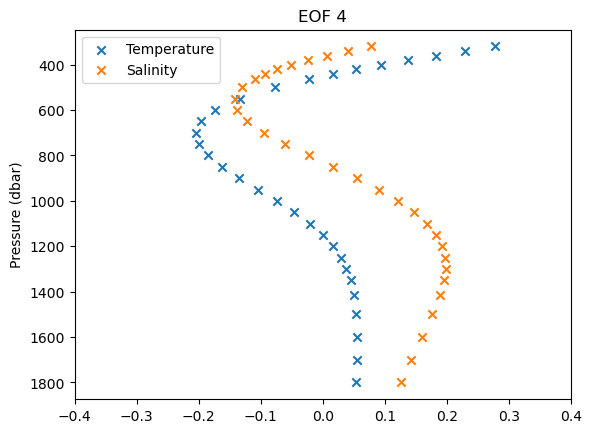

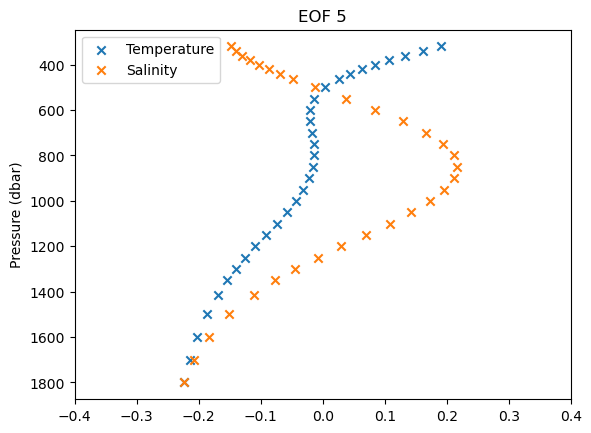

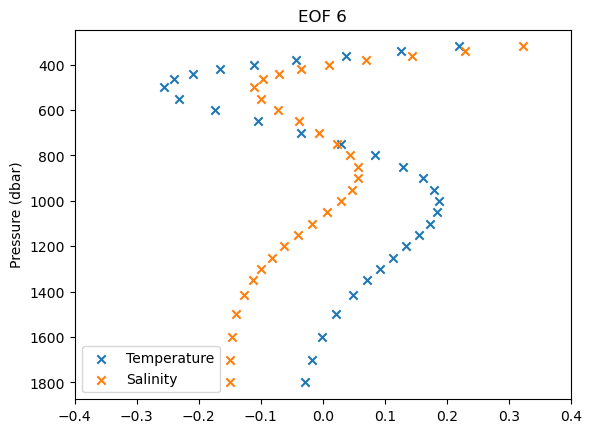

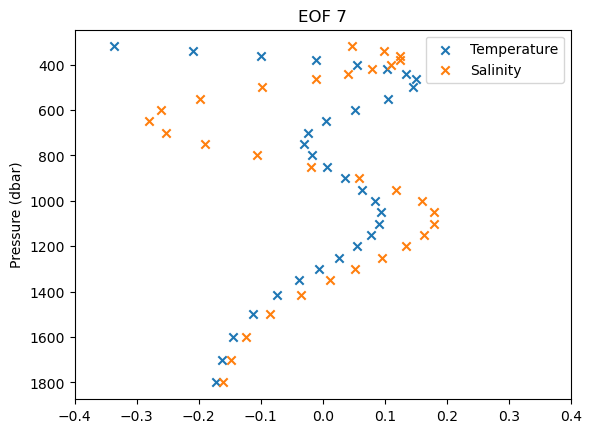

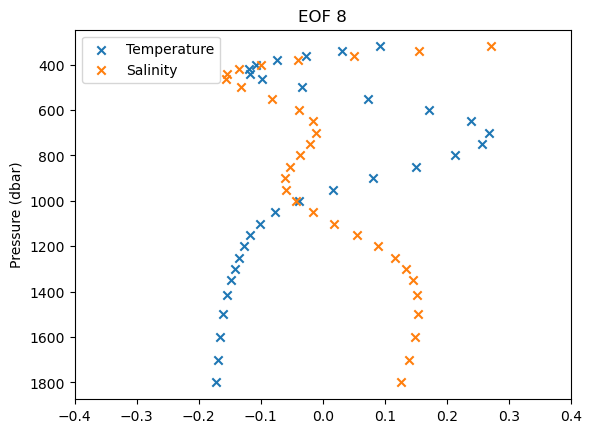

In [8]:
for i in range(8):
    plt.xlim((-0.4, 0.4))
    plt.scatter(U.T[i][:31], pressure_lookup[25:56], marker='x')
    plt.scatter(U.T[i][31:], pressure_lookup[25:56], marker='x')
    plt.legend(['Temperature', 'Salinity'])
    plt.ylabel('Pressure (dbar)')
    plt.title(f'EOF {i+1}')
    plt.gca().invert_yaxis()
    plt.show()